This is used in `TCGA-KIRC 3 Filter to marker genes, run ComBat, prep Stan dicts.ipynb`. (Read that first!)

Modeled off `R data prep.ipynb`

In [1]:
if (!require('formatR')) install.packages('formatR')

In [2]:
source("https://bioconductor.org/biocLite.R")
biocLite()

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Old packages: 'assertthat', 'backports', 'BH', 'boot', 'broom', 'car', 'caret',
  'cluster', 'colorspace', 'crayon', 'curl', 'DBI', 'devtools', 'digest',
  'dplyr', 'evaluate', 'forcats', 'forecast', 'foreign', 'git2r', 'haven',
  'htmltools', 'httpuv', 'httr', 'jsonlite', 'knitr', 'lattice', 'lazyeval',
  'lme4', 'lubridate', 'markdown', 'MASS', 'Matrix', 'memoise', 'mgcv',
  'modelr', 'nlme', 'nycflights13', 'openssl', 'pbdZMQ', 'pbkrtest', 'psych',
  'purrr', 'quantreg', 'R6', 'Rcpp', 'RcppArmadillo', 'RcppEigen', 'readr',
  'readxl', 'repr', 'rmarkdown', 'rpart', 'rprojroot', 'RSQLite', 'rstudioapi',
  'scales', 'selectr', 'shiny', 'sourcetools', 'SparseM', 'stringi', 'stringr',
  'su

In [3]:
if (!require('sva')) biocLite('sva')
library(sva)

Loading required package: sva
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-16. For overview type 'help("mgcv-package")'.
Loading required package: genefilter


In [4]:
dat_counts = read.csv('tcgakirc.combined.raw.combat_input.counts.tsv', sep='\t', row.names=1)
head(dat_counts)

,X953473f4.9927.4fd4.bfee.8f5908638cc7,df66c814.1407.4899.a6e3.9c2a928e6ea0,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X87c1d789.9482.442a.8b42.97bb479060e3,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X383ba5ca.1706.4959.b543.ea87fbd367bd,d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,X550af27b.de50.402f.8a81.c508e3dc6781,c81f9d5b.f58d.411d.9e1a.f919a0ef5636,cf0052ae.8440.49df.a20c.f260980c9922,⋯,CD8_Effector.sampleid.2,CD8_Effector.sampleid.20,CD8_Effector.sampleid.25,CD8_Effector.sampleid.56,CD8_Effector.sampleid.8,CD8_Naive.sampleid.27,CD8_Naive.sampleid.40,CD8_Naive.sampleid.47,CD8_Naive.sampleid.58,CD8_Naive.sampleid.62
ABCB4,6.561507,6.104510,6.439970,5.885868,4.780072,6.648333,5.362536,6.329941,6.264012,5.965838,⋯,1.098612,2.079442,1.947962,2.302585,0.6931472,2.198396,2.565462,2.080656,1.610132,2.079442
ABCC4,8.413711,9.095101,7.469923,8.347997,8.195988,8.481975,7.288892,8.980409,9.063691,8.632075,⋯,4.282047,3.903095,5.008213,4.290876,4.9582422,4.785497,3.976639,3.833354,4.486932,5.096698
ABCG2,7.782389,8.377472,6.287859,7.632401,6.747587,7.241366,7.850105,6.456769,7.680635,5.081402,⋯,1.098612,3.970292,3.610918,3.135493,2.8332133,3.583519,4.700480,4.127135,3.295838,2.944439
ABHD2,9.248136,9.730278,8.497598,9.209793,8.009982,9.039929,8.152356,9.553096,9.588735,9.443778,⋯,6.460766,7.344138,6.955704,7.094800,6.6734889,6.546612,7.468739,6.721209,6.847852,6.439608
ABHD5,6.418562,6.963494,5.755742,6.629616,6.272879,6.818446,5.843869,6.260461,6.382567,6.234410,⋯,4.330733,4.442652,4.110873,4.264087,4.0943437,4.094345,3.807695,3.178054,3.931826,3.914728
ABI1,8.205682,8.680304,7.962073,8.445352,8.801567,8.340999,7.717251,8.199305,8.172675,8.285937,⋯,7.498816,7.588783,7.335634,7.622522,7.2503267,7.483214,7.130098,6.927558,7.472968,7.029881


In [5]:
dat_tpm = read.csv('tcgakirc.combined.raw.combat_input.tpm.tsv', sep='\t', row.names=1)
head(dat_tpm)

,X953473f4.9927.4fd4.bfee.8f5908638cc7,df66c814.1407.4899.a6e3.9c2a928e6ea0,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X87c1d789.9482.442a.8b42.97bb479060e3,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X383ba5ca.1706.4959.b543.ea87fbd367bd,d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,X550af27b.de50.402f.8a81.c508e3dc6781,c81f9d5b.f58d.411d.9e1a.f919a0ef5636,cf0052ae.8440.49df.a20c.f260980c9922,⋯,CD8_Effector.sampleid.2,CD8_Effector.sampleid.20,CD8_Effector.sampleid.25,CD8_Effector.sampleid.56,CD8_Effector.sampleid.8,CD8_Naive.sampleid.27,CD8_Naive.sampleid.40,CD8_Naive.sampleid.47,CD8_Naive.sampleid.58,CD8_Naive.sampleid.62
ABCB4,1.786577,1.215977,1.960582,1.278563,1.026254,2.062886,1.382510,1.729957,1.589234,1.4327721,⋯,0.33464249,0.4094282,0.1836532,0.7343896,0.1716212,0.2671015,0.4094716,0.2833021,0.09714486,0.6627766
ABCC4,3.052037,3.404190,2.542866,2.944869,3.268303,3.195574,1.894603,3.481405,3.755063,3.0886729,⋯,1.74068966,1.1823089,1.7486601,1.7491936,1.8154924,1.5832845,1.0669215,0.8104372,1.43275825,1.5239731
ABCG2,2.938073,3.135846,1.851018,2.716802,2.220262,2.397592,2.665559,1.655075,2.826349,0.6550813,⋯,0.09633874,0.8343481,1.1492553,0.4558616,0.3632157,0.5924734,1.2356244,0.9697333,0.48366291,0.4249965
ABHD2,3.365501,3.568185,3.046352,3.292031,2.663061,3.247669,2.177218,3.570614,3.833753,3.4768716,⋯,3.78506078,3.3033013,2.8752610,3.3237984,2.6523086,2.8796724,3.3652057,2.9060164,2.90770929,2.6970883
ABHD5,2.427891,2.638941,2.156326,2.594299,2.692320,2.861580,1.739094,2.180282,2.518814,2.1196944,⋯,2.67020371,2.1105974,1.9026886,2.1095728,2.1793423,1.8393305,1.4143904,1.0966757,1.86131974,1.9763645
ABI1,3.594248,3.830871,3.667403,3.801794,4.429672,3.801478,2.731565,3.595249,3.784747,3.6056899,⋯,4.77781258,4.2980866,4.0300025,4.3313040,3.9384416,4.1242395,3.6787542,3.6618860,4.01786011,3.8433336


In [7]:
stopifnot(is.numeric(as.matrix(dat_counts)))

In [8]:
batch = read.table('tcgakirc.sample_info_batches.combat_input.tsv', header=T, sep='\t')
row.names(batch) = batch[, "Array.name"]
head(batch)

,Array.name,Sample.name,Batch
X953473f4.9927.4fd4.bfee.8f5908638cc7,X953473f4.9927.4fd4.bfee.8f5908638cc7,X953473f4.9927.4fd4.bfee.8f5908638cc7,2
df66c814.1407.4899.a6e3.9c2a928e6ea0,df66c814.1407.4899.a6e3.9c2a928e6ea0,df66c814.1407.4899.a6e3.9c2a928e6ea0,2
X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,2
X87c1d789.9482.442a.8b42.97bb479060e3,X87c1d789.9482.442a.8b42.97bb479060e3,X87c1d789.9482.442a.8b42.97bb479060e3,2
X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,2
X383ba5ca.1706.4959.b543.ea87fbd367bd,X383ba5ca.1706.4959.b543.ea87fbd367bd,X383ba5ca.1706.4959.b543.ea87fbd367bd,2


In [9]:
mod0 = model.matrix(~1, data=batch)
mod0

,(Intercept)
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
10,1


In [10]:
normalized_log_vals_counts = sva::ComBat(as.matrix(dat_counts), batch$Batch, mod0)
head(normalized_log_vals_counts)

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


,X953473f4.9927.4fd4.bfee.8f5908638cc7,df66c814.1407.4899.a6e3.9c2a928e6ea0,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X87c1d789.9482.442a.8b42.97bb479060e3,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X383ba5ca.1706.4959.b543.ea87fbd367bd,d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,X550af27b.de50.402f.8a81.c508e3dc6781,c81f9d5b.f58d.411d.9e1a.f919a0ef5636,cf0052ae.8440.49df.a20c.f260980c9922,⋯,CD8_Effector.sampleid.2,CD8_Effector.sampleid.20,CD8_Effector.sampleid.25,CD8_Effector.sampleid.56,CD8_Effector.sampleid.8,CD8_Naive.sampleid.27,CD8_Naive.sampleid.40,CD8_Naive.sampleid.47,CD8_Naive.sampleid.58,CD8_Naive.sampleid.62
ABCB4,5.604789,4.989663,5.441197,4.695368,3.206950,5.721657,3.990956,5.293097,5.204355,4.803009,⋯,3.045455,3.828179,3.723255,4.006253,2.721885,3.923108,4.216035,3.829148,3.453659,3.828179
ABCC4,6.723146,7.416427,5.762887,6.656285,6.501623,6.792601,5.578697,7.299733,7.384469,6.945320,⋯,6.410316,6.040199,7.119551,6.418939,7.070746,6.902028,6.112029,5.972084,6.610424,7.205973
ABCG2,6.101578,6.699815,4.599124,5.950794,5.061290,5.557687,6.169653,4.768931,5.999285,3.386272,⋯,3.231073,6.076638,5.720532,5.249430,4.949900,5.693383,6.800186,6.232055,5.408317,5.060114
ABHD2,8.297409,8.716740,7.644649,8.264061,7.220558,8.116327,7.344384,8.562640,8.593636,8.467564,⋯,7.483745,8.625189,8.123277,8.303010,7.758614,7.594671,8.786192,7.820276,7.983917,7.456407
ABHD5,5.445609,6.019959,4.747008,5.668057,5.292061,5.867080,4.839893,5.278973,5.407671,5.251516,⋯,5.544617,5.649848,5.337894,5.481953,5.322352,5.322353,5.052832,4.460813,5.169545,5.153469
ABI1,7.902721,8.398943,7.648025,8.153298,8.525724,8.044196,7.392062,7.896054,7.868212,7.986628,⋯,7.879883,7.965179,7.725173,7.997166,7.644294,7.865091,7.530308,7.338284,7.855377,7.435294


In [11]:
mod0

,(Intercept)
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
10,1


In [12]:
normalized_log_vals_tpm = sva::ComBat(as.matrix(dat_tpm), batch$Batch, mod0)
head(normalized_log_vals_tpm)

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


,X953473f4.9927.4fd4.bfee.8f5908638cc7,df66c814.1407.4899.a6e3.9c2a928e6ea0,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X87c1d789.9482.442a.8b42.97bb479060e3,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X383ba5ca.1706.4959.b543.ea87fbd367bd,d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,X550af27b.de50.402f.8a81.c508e3dc6781,c81f9d5b.f58d.411d.9e1a.f919a0ef5636,cf0052ae.8440.49df.a20c.f260980c9922,⋯,CD8_Effector.sampleid.2,CD8_Effector.sampleid.20,CD8_Effector.sampleid.25,CD8_Effector.sampleid.56,CD8_Effector.sampleid.8,CD8_Naive.sampleid.27,CD8_Naive.sampleid.40,CD8_Naive.sampleid.47,CD8_Naive.sampleid.58,CD8_Naive.sampleid.62
ABCB4,1.813531,1.031377,2.052049,1.117168,0.7713141,2.192284,1.259653,1.735919,1.543022,1.328551,⋯,0.6522927,0.7116309,0.5324913,0.9694693,0.5229446,0.5987028,0.7116654,0.6115571,0.4638519,0.9126485
ABCC4,2.442108,2.759634,1.983003,2.345478,2.6371086,2.571531,1.398481,2.829257,3.076007,2.475141,⋯,2.5278327,1.8682620,2.5372475,2.5378778,2.6161913,2.3419025,1.7319640,1.4289994,2.1640978,2.2718427
ABCG2,2.186220,2.349683,1.287751,2.003336,1.5929374,1.739504,1.960982,1.125802,2.093878,0.299291,⋯,0.5602981,1.6931307,2.1765084,1.1121600,0.9699500,1.3218570,2.3090834,1.9009449,1.1548346,1.0647825
ABHD2,3.398753,3.564461,3.137828,3.338686,2.8244614,3.302417,2.427252,3.566447,3.781580,3.489806,⋯,3.9966389,3.2190550,2.5281764,3.2521383,2.1683201,2.5352966,3.3189717,2.5778172,2.5805495,2.2405968
ABHD5,2.349656,2.567853,2.068895,2.521700,2.6230395,2.798031,1.637535,2.093662,2.443659,2.031023,⋯,2.7517264,2.2143228,2.0146629,2.2133389,2.2803403,1.9538186,1.5457384,1.2406292,1.9749354,2.0854158
ABI1,3.971808,4.179461,4.036006,4.153944,4.7049527,4.153667,3.214740,3.972685,4.138984,3.981848,⋯,4.3922072,3.7883899,3.4509602,3.8301997,3.3357152,3.5695736,3.0088541,2.9876227,3.4356770,3.2160054


In [13]:
write.table(normalized_log_vals_counts, "tcgakirc.combat_output.counts.tsv", sep="\t")

In [14]:
write.table(normalized_log_vals_tpm, "tcgakirc.combat_output.tpm.tsv", sep="\t")

Those are thrown back to `TCGA-KIRC 3..` notebook

# PCA with and without batch correction

## Do PCA post-ComBat

In [15]:
# https://genomicsclass.github.io/book/pages/svacombat.html
s= svd(normalized_log_vals_tpm - rowMeans(normalized_log_vals_tpm))

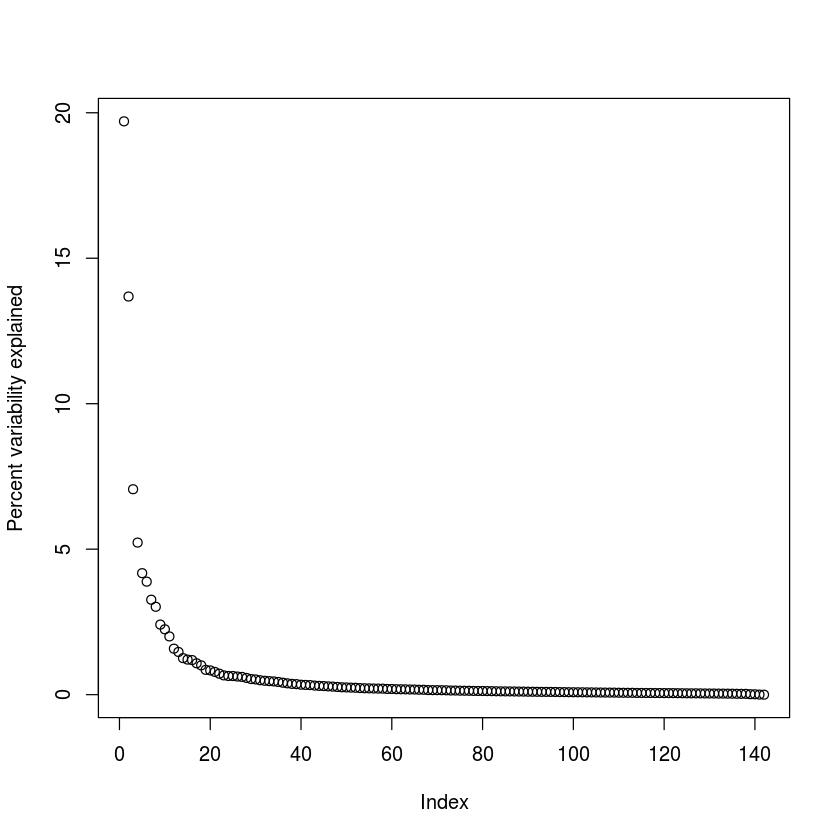

In [16]:
# https://genomicsclass.github.io/book/pages/svd.html
plot(s$d^2/sum(s$d^2)*100,ylab="Percent variability explained")


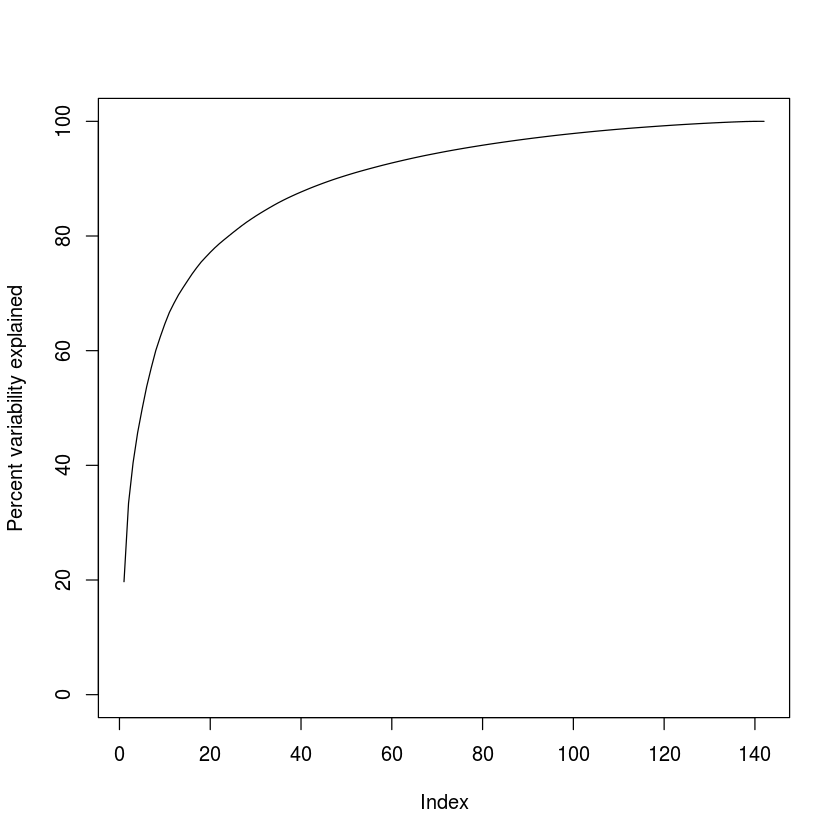

In [17]:
plot(cumsum(s$d^2)/sum(s$d^2)*100,ylab="Percent variability explained",ylim=c(0,100),type="l")


[1] "sdev"     "rotation" "center"   "scale"    "x"

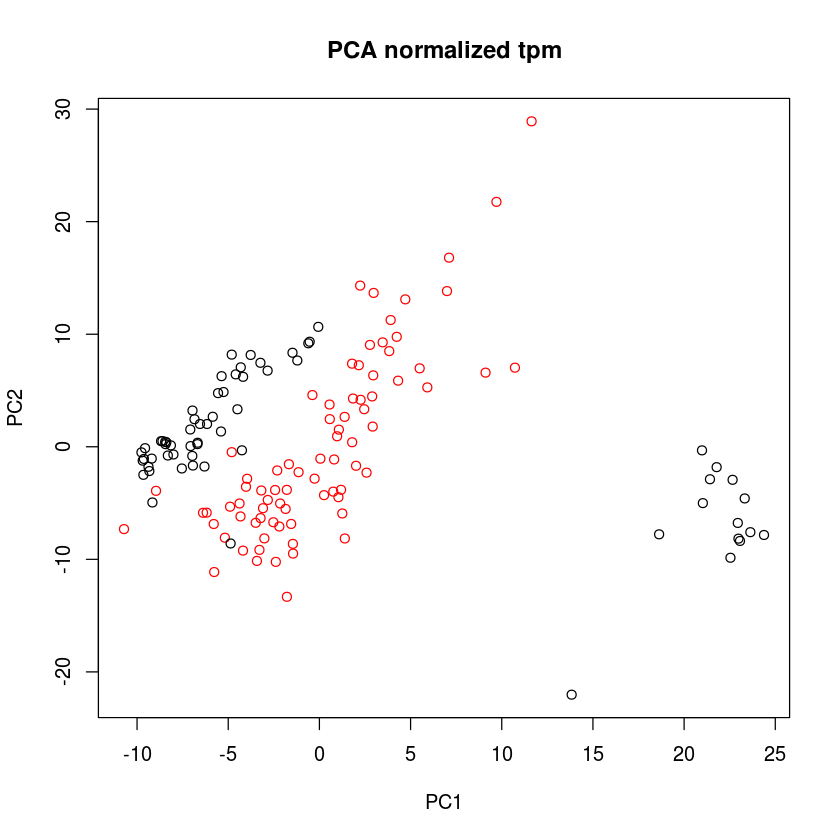

In [18]:
# https://genomicsclass.github.io/book/pages/pca_svd.html
x = t(normalized_log_vals_tpm)
pc = prcomp(x)
names(pc)
plot(pc$x[, 1], pc$x[, 2], col=batch$Batch, main = "PCA normalized tpm", xlab = "PC1", ylab = "PC2")


[1] "sdev"     "rotation" "center"   "scale"    "x"

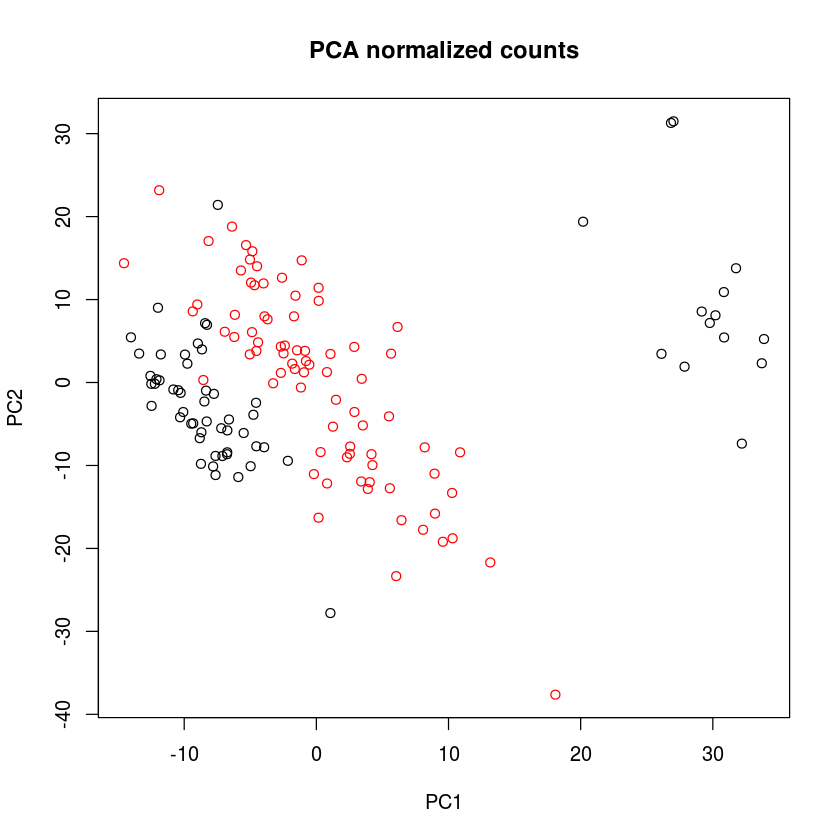

In [39]:
# https://genomicsclass.github.io/book/pages/pca_svd.html
x = t(normalized_log_vals_counts)
pc = prcomp(x)
names(pc)
plot(pc$x[, 1], pc$x[, 2], col=batch$Batch, main = "PCA normalized counts", xlab = "PC1", ylab = "PC2")

In [40]:
if (!require("ggplot2")) install.packages('ggplot2')

In [41]:
library(ggplot2)

In [42]:
pc$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142
X953473f4.9927.4fd4.bfee.8f5908638cc7,-2.6878044,4.32912694,9.53474104,-0.9682798,1.3238271,-4.6558540,2.31658257,0.37478988,-1.50677797,0.9062241,⋯,-0.46976725,-0.051495069,0.87944994,0.34818573,-0.26368789,-0.130886131,0.363527168,-0.280356648,0.14469679,6.878666e-15
df66c814.1407.4899.a6e3.9c2a928e6ea0,-5.7078620,13.50836725,13.01359384,2.0863601,0.9163532,-2.1327945,6.01969366,-1.49223637,-0.63932104,-3.3938418,⋯,-0.91859974,-0.170680382,-0.60903116,-0.47964202,-0.37458698,0.265360109,-0.713145635,0.465549691,0.15042565,8.063862e-15
X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,4.2442790,-9.95520629,-0.87925920,-6.5359855,-1.0099589,-2.4876341,6.82215542,5.75300968,-1.56078115,-4.2470211,⋯,0.09640054,-0.365785728,-0.17274961,-0.02479952,0.19863056,0.082195202,-0.253932720,0.006252711,0.13654665,9.928907e-15
X87c1d789.9482.442a.8b42.97bb479060e3,-5.0235352,14.82386901,4.70221783,2.0530330,-3.8942347,-1.5958366,2.31988193,2.61743215,-0.93140174,-0.3913381,⋯,-0.90453072,0.132634906,-0.30627737,0.23834573,0.32848308,-0.381792208,-0.061573852,-0.142397095,0.14164077,8.369173e-15
X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,6.0420570,-23.33888534,-11.15639101,15.3631745,2.1866202,-7.8826375,17.14906502,5.86187924,-8.75552105,-15.8892014,⋯,-0.06860575,0.157545724,0.15216859,0.08552147,-0.03899841,0.143340857,-0.159639194,-0.126887265,0.11435133,6.974456e-15
X383ba5ca.1706.4959.b543.ea87fbd367bd,-1.5824316,10.46817105,2.61683879,-0.2533982,-2.4112693,-2.2870409,6.31248304,3.72274812,1.24682594,-2.4370158,⋯,0.93291437,0.027842254,1.30555956,1.15125113,-0.46251837,0.017778577,-0.430582575,-0.081495111,0.08038424,9.463581e-15
d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,3.8954162,-12.83509131,6.82445491,-7.7353052,7.6509370,-6.0954545,-2.98010481,-1.66054034,-0.09910216,0.9818796,⋯,0.93240197,-0.105500234,-0.25367927,-0.08817514,0.04382181,0.050064051,-0.295014992,0.225989946,0.12053943,3.341945e-15
X550af27b.de50.402f.8a81.c508e3dc6781,-9.0087859,9.40940651,-6.49312350,2.2467293,5.8814009,1.6066918,2.53338138,-2.52815090,-0.06470938,-4.3694967,⋯,0.48878916,0.499052442,0.35033650,0.31180134,-0.03537507,0.478735186,0.417057467,0.022185437,0.12478440,7.481483e-15
c81f9d5b.f58d.411d.9e1a.f919a0ef5636,-4.8683062,6.07185344,0.74312123,0.4227941,5.1089812,-1.8434377,2.80748330,-2.22588527,-2.73714517,-2.3886095,⋯,0.04626284,-0.204562837,-0.19427642,0.50235704,-0.05260319,0.457028181,0.099210389,0.199922174,0.09164701,3.907139e-15
cf0052ae.8440.49df.a20c.f260980c9922,-4.8473800,15.82207378,-21.75504432,1.8816382,-2.0911171,6.2746063,-2.38228037,1.86372633,-1.87073985,1.2461518,⋯,-0.26788291,-0.023633850,-0.23850913,0.18155999,-0.01085785,-0.219125902,0.033683249,0.096607058,0.15098580,8.273764e-15


In [43]:
plotdf = as.data.frame(cbind(pc$x[, 1], pc$x[, 2], batch$Batch))
names(plotdf) = c('PC1', 'PC2', 'Group')
head(plotdf)

,PC1,PC2,Group
X953473f4.9927.4fd4.bfee.8f5908638cc7,-2.687804,4.329127,2
df66c814.1407.4899.a6e3.9c2a928e6ea0,-5.707862,13.508367,2
X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,4.244279,-9.955206,2
X87c1d789.9482.442a.8b42.97bb479060e3,-5.023535,14.823869,2
X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,6.042057,-23.338885,2
X383ba5ca.1706.4959.b543.ea87fbd367bd,-1.582432,10.468171,2


In [44]:
library(plyr)
plotdf$GroupStr = revalue(as.character(plotdf$Group), c("1"="single origin", "2"="TCGA KIRC"))

Saving 6.67 x 6.67 in image


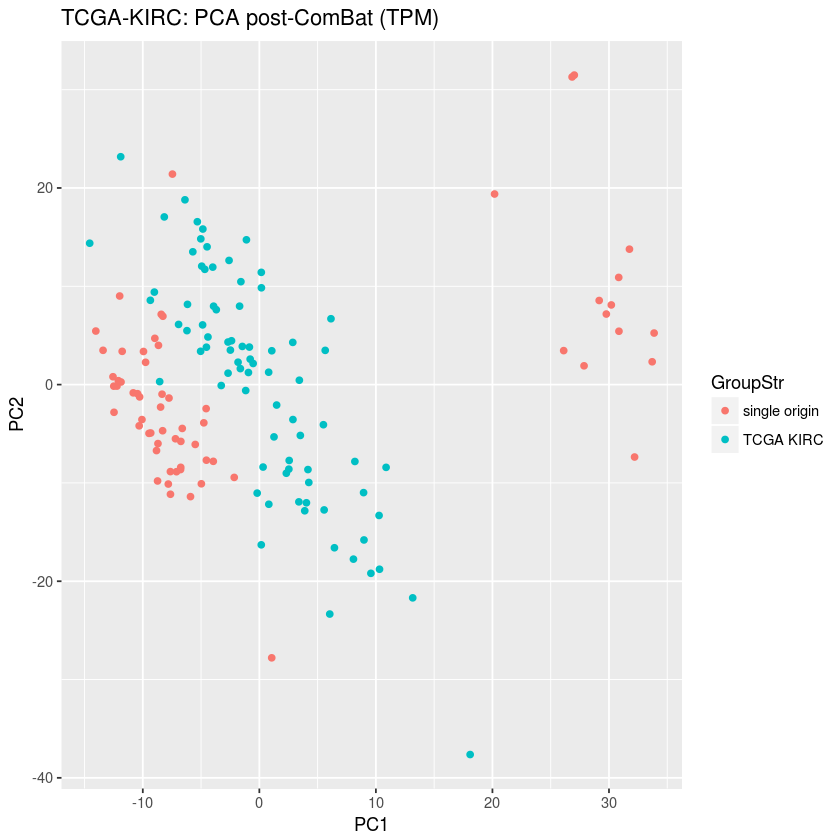

In [45]:
ggplot(plotdf, aes(x = PC1, y = PC2, colour = GroupStr)) +
geom_point() +
ggtitle("TCGA-KIRC: PCA post-ComBat (TPM)") +
ggsave("tcgakirc_pca_postcombat.pdf")

Saving 6.67 x 6.67 in image


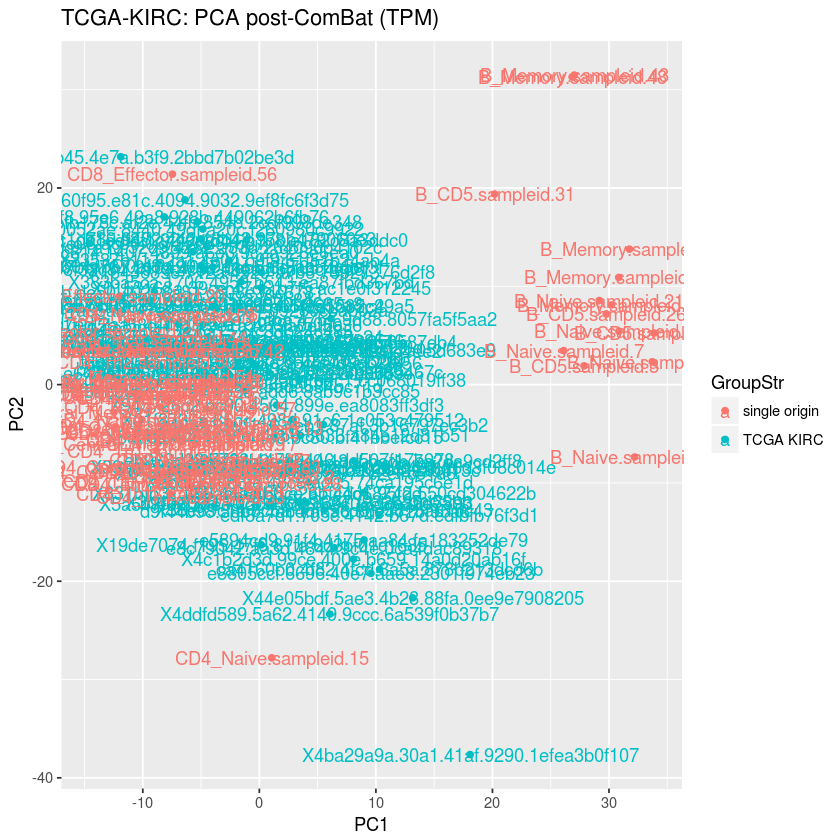

In [54]:
ggplot(plotdf, aes(x = PC1, y = PC2, colour = GroupStr, label = row.names(plotdf))) +
geom_point() +
#geom_text(check_overlap=TRUE) +
geom_text() +
ggtitle("TCGA-KIRC: PCA post-ComBat (TPM)") +
ggsave("tcgakirc_pca_postcombat.messy_labels.pdf")

# PCA before ComBat

[1] "sdev"     "rotation" "center"   "scale"    "x"

,PC1,PC2,Group
X953473f4.9927.4fd4.bfee.8f5908638cc7,-21.77623,-4.060391,2
df66c814.1407.4899.a6e3.9c2a928e6ea0,-22.04501,-4.360623,2
X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,-21.88071,-2.530473,2
X87c1d789.9482.442a.8b42.97bb479060e3,-22.76139,-4.557004,2
X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,-18.92590,-1.507892,2
X383ba5ca.1706.4959.b543.ea87fbd367bd,-24.32454,-3.502217,2


Saving 6.67 x 6.67 in image


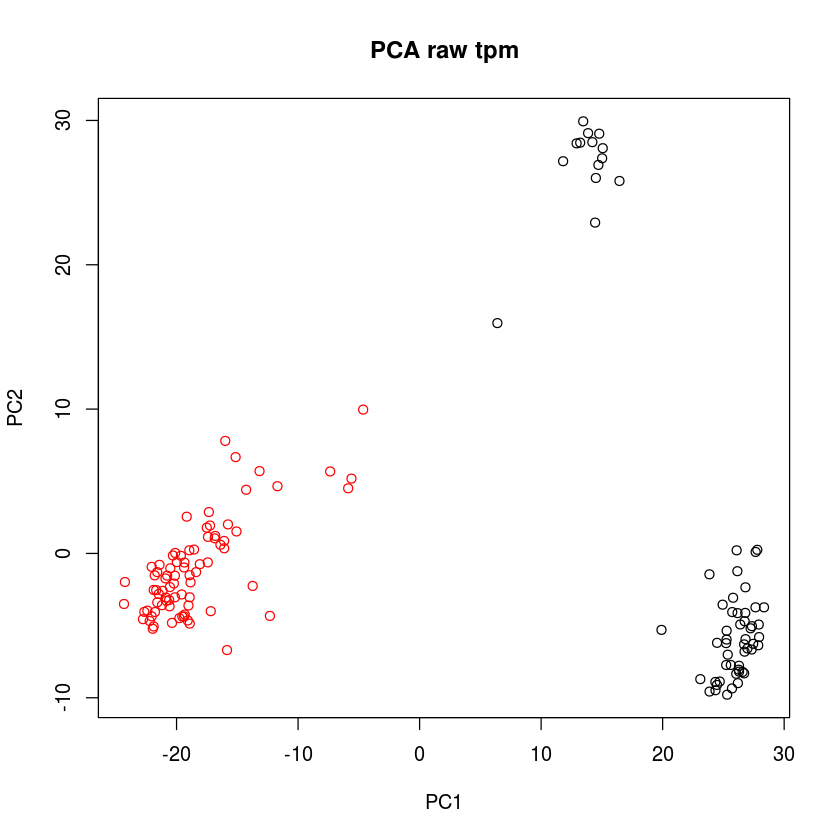

Saving 6.67 x 6.67 in image


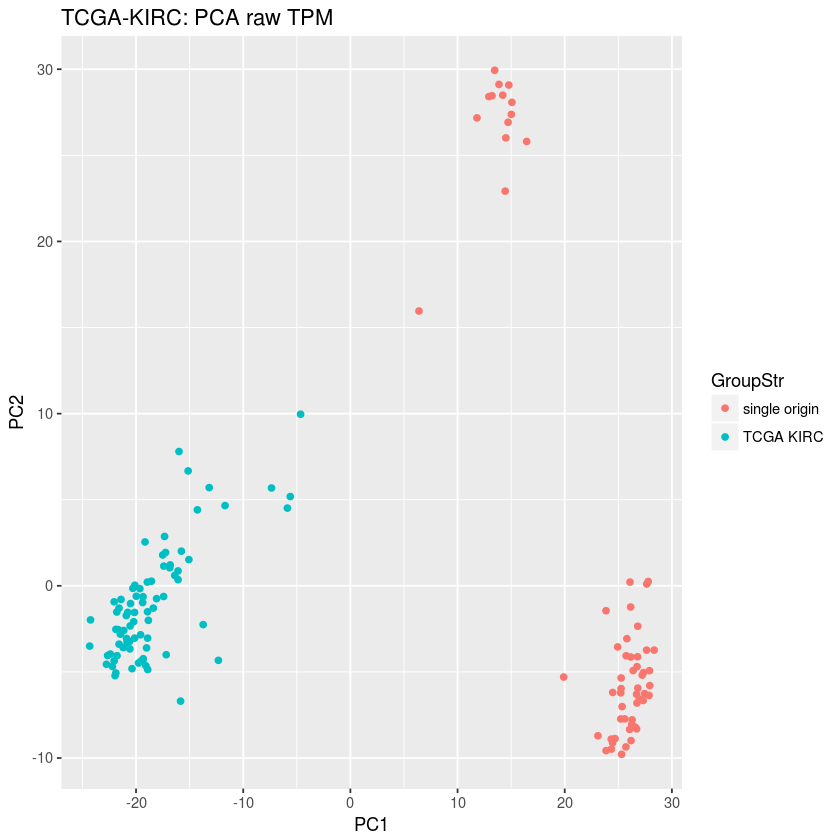

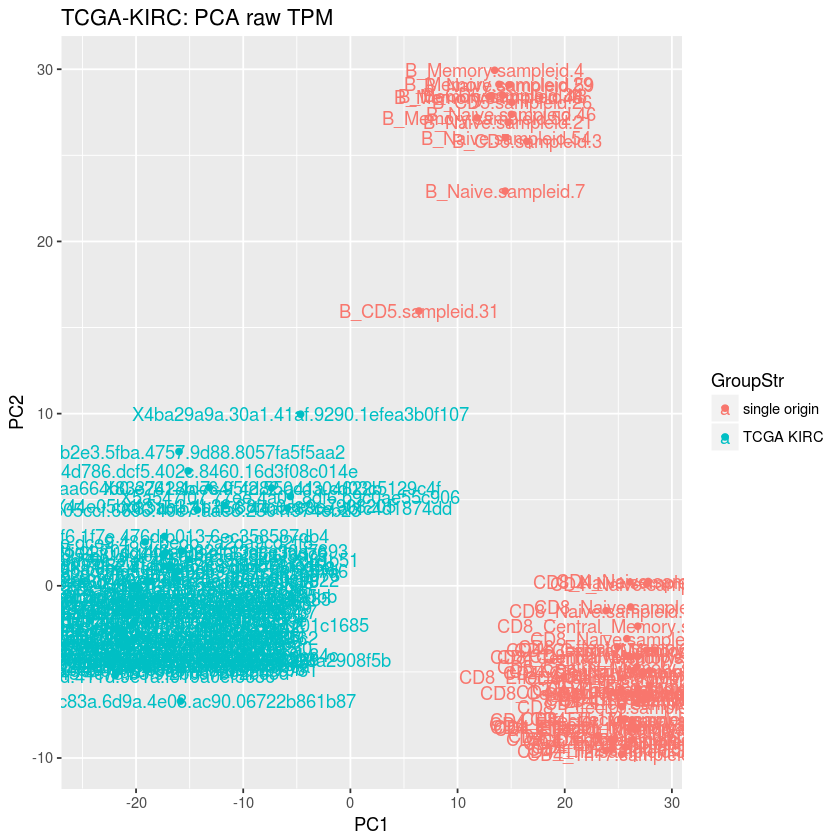

In [55]:
# https://genomicsclass.github.io/book/pages/pca_svd.html
x2 = t(dat_tpm) # normalized_log_vals_tpm
pc2 = prcomp(x2)
names(pc2)
plot(pc2$x[, 1], pc2$x[, 2], col=batch$Batch, main = "PCA raw tpm", xlab = "PC1", ylab = "PC2")
plotdf2 = as.data.frame(cbind(pc2$x[, 1], pc2$x[, 2], batch$Batch))
names(plotdf2) = c('PC1', 'PC2', 'Group')
head(plotdf2)
library(plyr)
plotdf2$GroupStr = revalue(as.character(plotdf2$Group), c("1"="single origin", "2"="TCGA KIRC"))
library(ggplot2)
ggplot(plotdf2, aes(x = PC1, y = PC2, colour = GroupStr, label = row.names(plotdf2))) +
geom_point() +
ggtitle("TCGA-KIRC: PCA raw TPM") +
ggsave("tcgakirc_pca_raw.pdf")

ggplot(plotdf2, aes(x = PC1, y = PC2, colour = GroupStr, label = row.names(plotdf2))) +
geom_point() +
#geom_text(check_overlap=TRUE) +
geom_text() +
ggtitle("TCGA-KIRC: PCA raw TPM") +
ggsave("tcgakirc_pca_raw.messy_labels.pdf")